In [1]:
import os, collections, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 300

In [8]:
dfs = []
for region in ("IGK", "TRA"):
    tsv = f"../../data/evaluation/CHM13/{region}/pbsim_ONT_93_30k/kmer_k16/overlap_statistics.tsv"
    df = pd.read_table(tsv)
    df.insert(0, "region", region)
    dfs.append(df)
stat_df = pd.concat(dfs)
df = stat_df
df['label'] = df['config_id'].map(str) + " " + df['description']
df['connected_fraction'] = 1 - df['singleton_fraction']

In [10]:
stat_df

,region,Unnamed: 0,config_id,description,n_neighbors,precision,nr_precision,recall,nr_recall,singleton_count,singleton_fraction,N50,label,connected_fraction
0,IGK,0,0,Minimap2 all-vs-all,2,0.516464,0.090937,0.049058,0.090412,2634,0.515864,28,0 Minimap2 all-vs-all,0.484136
1,IGK,1,0,Minimap2 all-vs-all,3,0.513960,0.095905,0.072551,0.141699,2204,0.431649,78,0 Minimap2 all-vs-all,0.568351
2,IGK,2,0,Minimap2 all-vs-all,4,0.511360,0.096075,0.095249,0.187310,1836,0.359577,105,0 Minimap2 all-vs-all,0.640423
3,IGK,3,0,Minimap2 all-vs-all,5,0.508627,0.095531,0.117038,0.230083,1534,0.300431,125,0 Minimap2 all-vs-all,0.699569
4,IGK,4,0,Minimap2 all-vs-all,6,0.503938,0.094373,0.137548,0.269613,1338,0.262045,209,0 Minimap2 all-vs-all,0.737955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,TRA,394,20,"Exact Euclidean (TF-IDF, 100 dim.)",16,0.927513,0.157447,0.432988,0.769336,4,0.001058,1891,"20 Exact Euclidean (TF-IDF, 100 dim.)",0.998942
395,TRA,395,20,"Exact Euclidean (TF-IDF, 100 dim.)",17,0.922245,0.152134,0.456487,0.788193,4,0.001058,1891,"20 Exact Euclidean (TF-IDF, 100 dim.)",0.998942
396,TRA,396,20,"Exact Euclidean (TF-IDF, 100 dim.)",18,0.915708,0.146332,0.479229,0.801585,2,0.000529,1891,"20 Exact Euclidean (TF-IDF, 100 dim.)",0.999471
397,TRA,397,20,"Exact Euclidean (TF-IDF, 100 dim.)",19,0.908618,0.141692,0.501971,0.819350,2,0.000529,1891,"20 Exact Euclidean (TF-IDF, 100 dim.)",0.999471


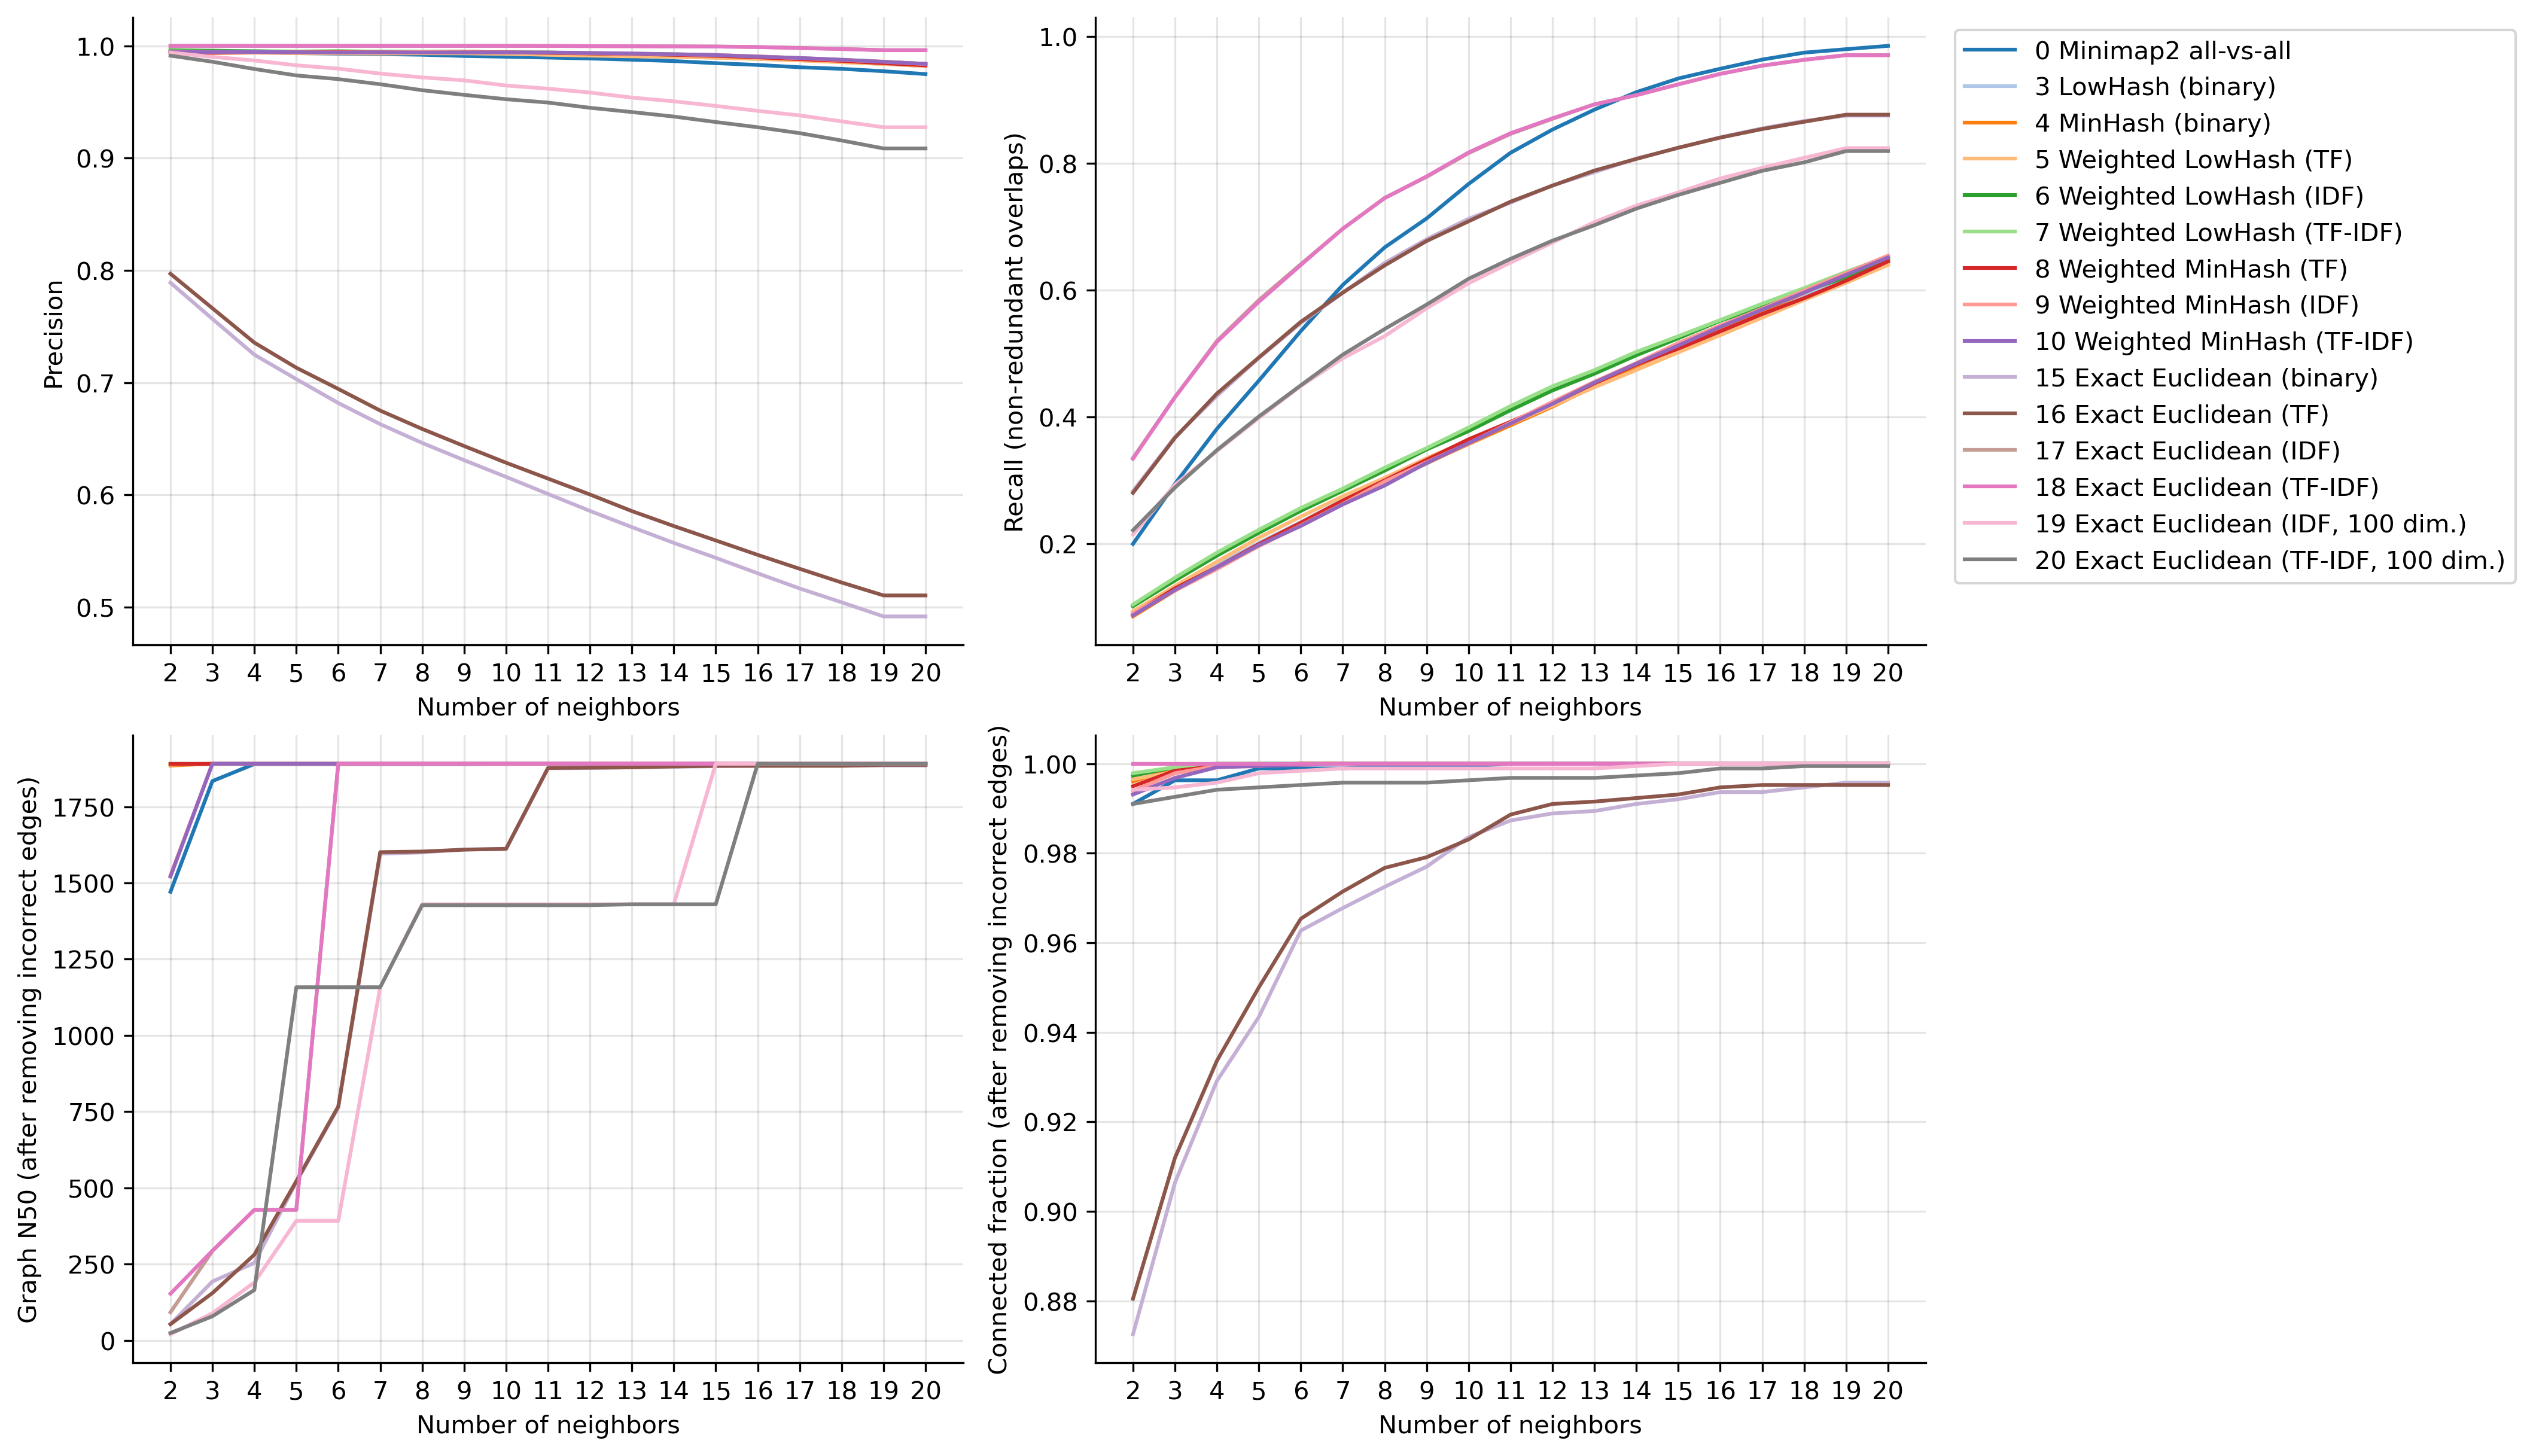

In [21]:
df = stat_df.query("region == 'TRA' & config_id not in (1, 2, 11, 12, 13, 14)")

y_labels = dict(
    precision="Precision",
    nr_recall="Recall (non-redundant overlaps)",
    N50="Graph N50 (after removing incorrect edges)",
    connected_fraction="Connected fraction (after removing incorrect edges)"
)

palette = 'tab20'
k_values = np.arange(2, df['n_neighbors'].max() + 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
for i, ax in enumerate( itertools.chain(*axes) ):
    y = list(y_labels)[i]
    x = 'n_neighbors'
    hue = 'label'
    g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=palette)
    ax.set_xticks(k_values)
    ax.set_xlabel("Number of neighbors")
    ax.set_ylabel(y_labels[y])
    ax.grid(axis='both', color='k', alpha=0.1)

    if i == 1:
        ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
    else:
        ax.get_legend().remove()

    ax.spines[['top', 'right']].set_visible(False)

(0.98, 1.001)

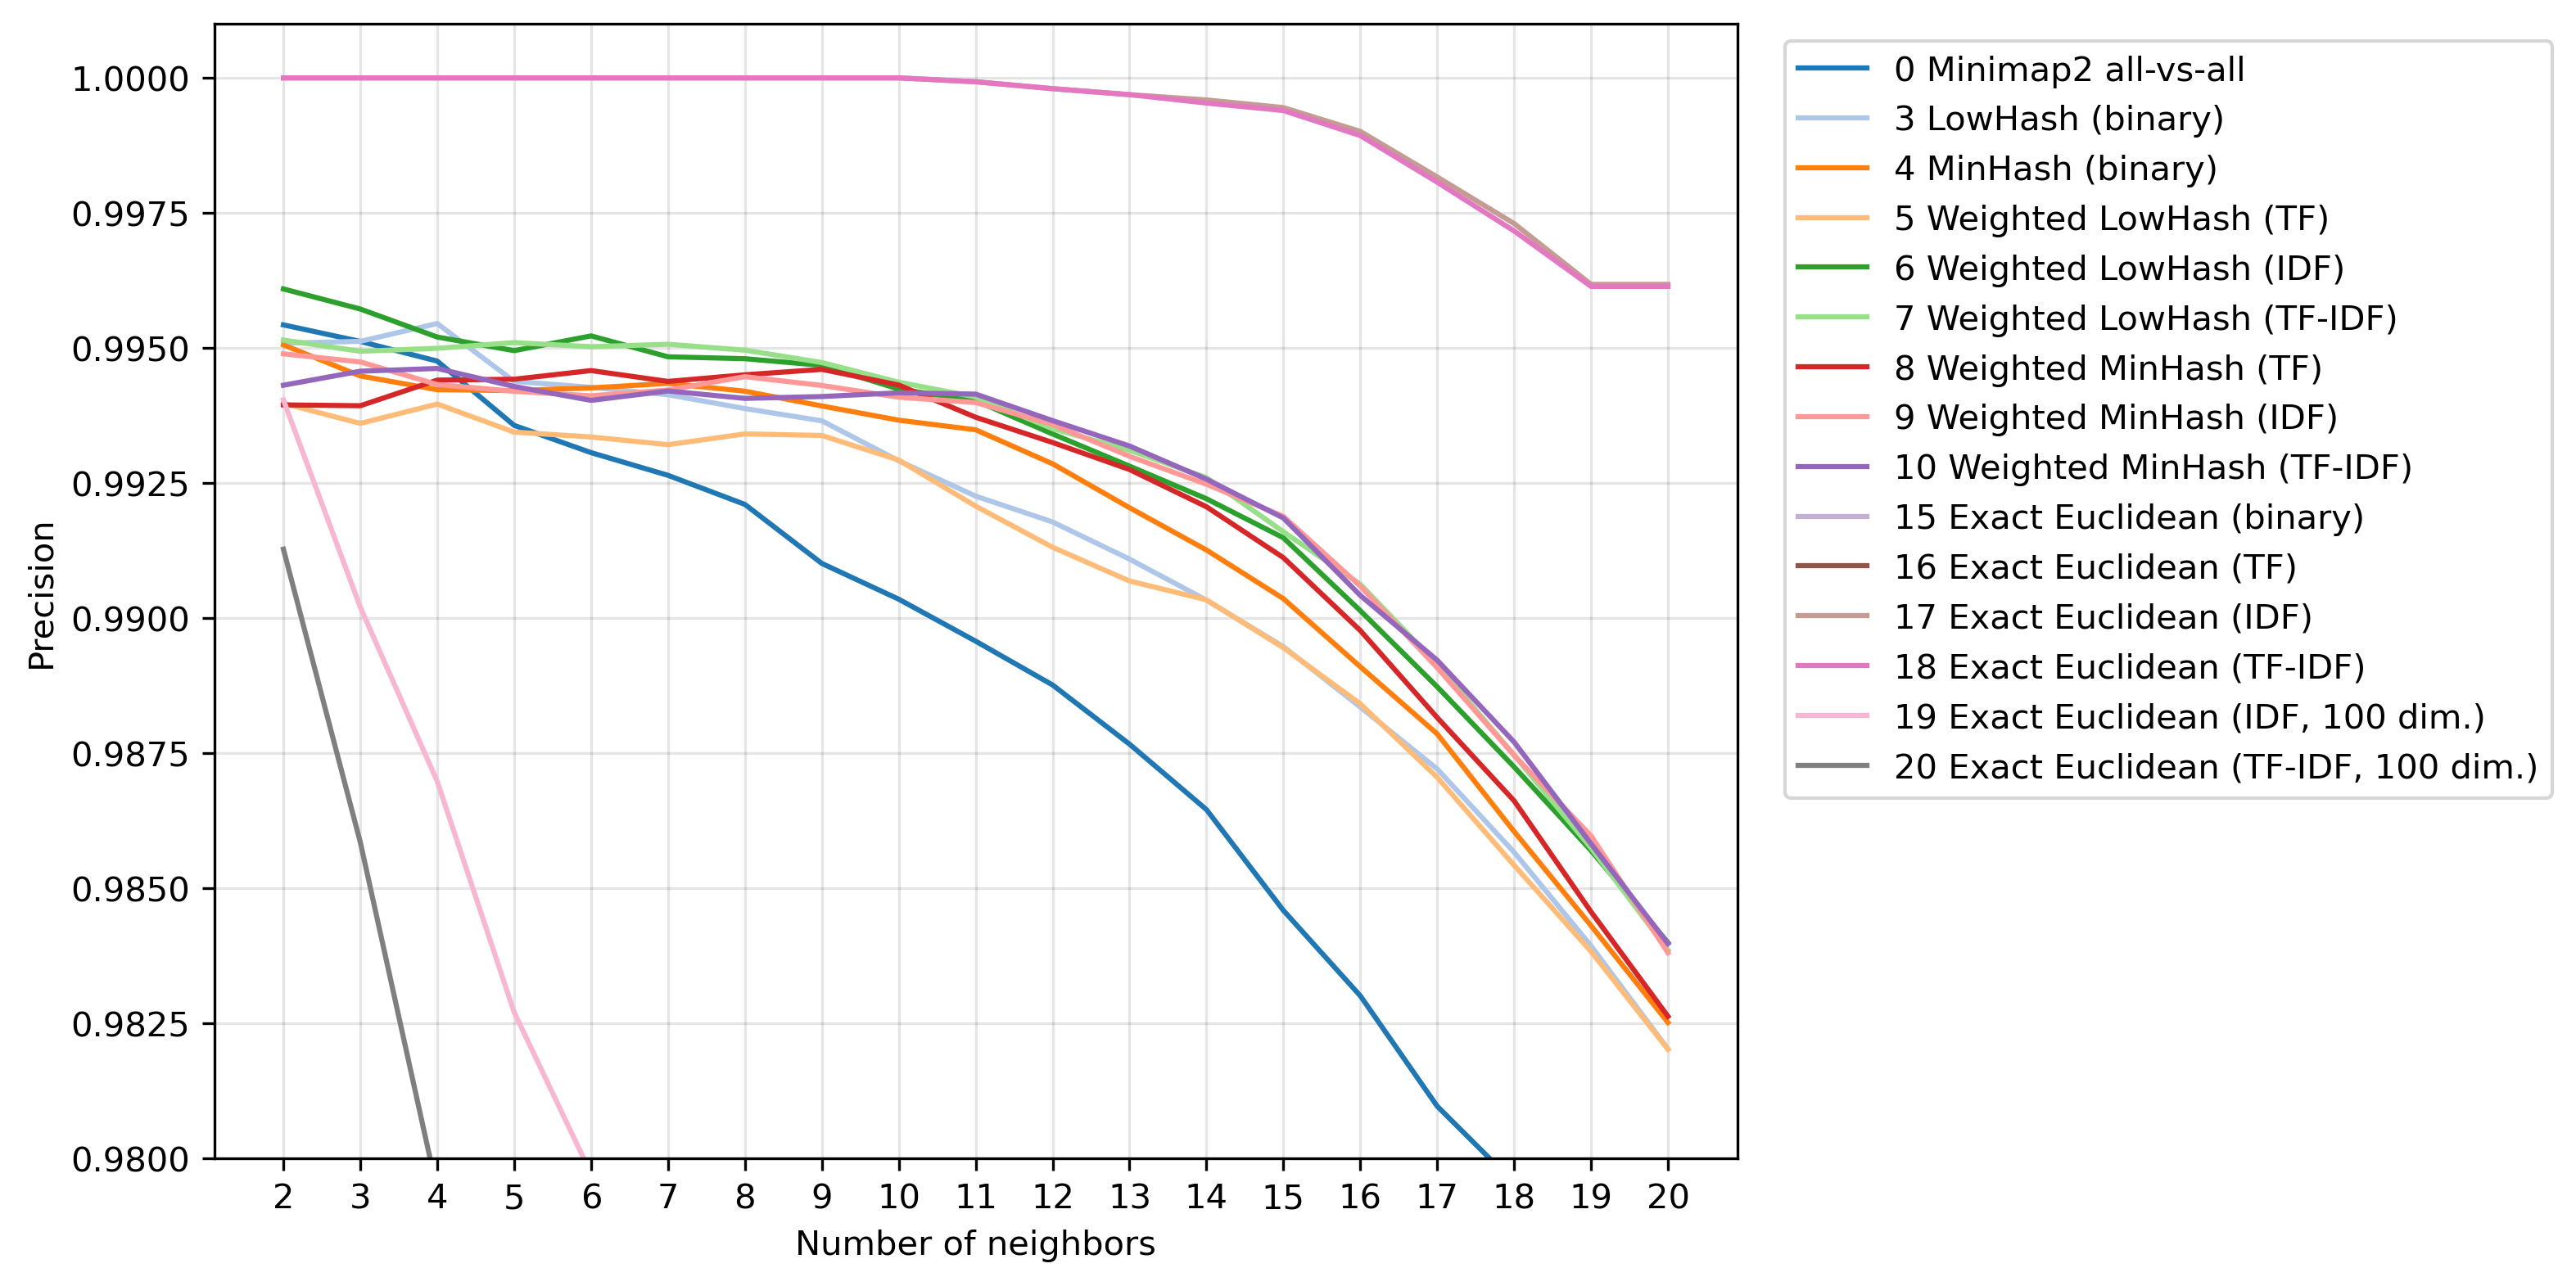

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
y = 'precision'
g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue='label', palette=palette)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_xticks(k_values)
ax.set_xlabel("Number of neighbors")
ax.set_ylabel(y_labels[y])
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_ylim(0.98, 1.001)